In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv("Air_Quality.csv")


In [4]:
df.shape

(16218, 12)

In [5]:
df.head()

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,172653,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2011,12/01/2010,25.30,NaN
1,172585,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2009,12/01/2008,26.93,NaN
2,336637,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,204,East New York,Annual Average 2015,01/01/2015,19.09,NaN
3,336622,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,103,Fordham - Bronx Pk,Annual Average 2015,01/01/2015,19.76,NaN
4,172582,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,104,Pelham - Throgs Neck,Annual Average 2009,12/01/2008,22.83,NaN


In [6]:
df.isnull()

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
16213,False,False,False,False,False,False,False,False,False,False,False,True
16214,False,False,False,False,False,False,False,False,False,False,False,True
16215,False,False,False,False,False,False,False,False,False,False,False,True
16216,False,False,False,False,False,False,False,False,False,False,False,True


In [7]:
df.isnull().sum()

Unique ID             0
Indicator ID          0
Name                  0
Measure               0
Measure Info          0
Geo Type Name         0
Geo Join ID           0
Geo Place Name        0
Time Period           0
Start_Date            0
Data Value            0
Message           16218
dtype: int64

In [8]:
df.drop(['Message'],axis = 1, inplace = True)

In [9]:
df.isnull().sum()

Unique ID         0
Indicator ID      0
Name              0
Measure           0
Measure Info      0
Geo Type Name     0
Geo Join ID       0
Geo Place Name    0
Time Period       0
Start_Date        0
Data Value        0
dtype: int64

In [10]:
df= pd.read_csv("Air_Quality.csv")


In [11]:
# Extracting the year from the 'Time Period' column
df['Year'] = df['Time Period'].str.extract('(\d{4})')

 (\d{4}) means "match a group of exactly four consecutive digits." It is used to extract the four-digit year from the 'Time Period' column, assuming that the year is represented by four digits in that column. For example, if 'Time Period' is 'Annual Average 2011', (\d{4}) will capture '2011' as a match.

In [12]:
df['Year']

0        2011
1        2009
2        2015
3        2015
4        2009
         ... 
16213    2005
16214    2005
16215    2005
16216    2005
16217    2016
Name: Year, Length: 16218, dtype: object

In [13]:
df['Name']

0                             Nitrogen dioxide (NO2)
1                             Nitrogen dioxide (NO2)
2                             Nitrogen dioxide (NO2)
3                             Nitrogen dioxide (NO2)
4                             Nitrogen dioxide (NO2)
                            ...                     
16213              Outdoor Air Toxics - Formaldehyde
16214              Outdoor Air Toxics - Formaldehyde
16215    Cardiac and respiratory deaths due to Ozone
16216    Cardiac and respiratory deaths due to Ozone
16217                  Annual vehicle miles traveled
Name: Name, Length: 16218, dtype: object

In [14]:
# Unique gases in the dataset
unique_gases = df['Name'].unique()

In [15]:
df['Name'].unique()

array(['Nitrogen dioxide (NO2)', 'Fine particles (PM 2.5)', 'Ozone (O3)',
       'Asthma emergency department visits due to PM2.5',
       'Annual vehicle miles traveled',
       'Asthma hospitalizations due to Ozone',
       'Respiratory hospitalizations due to PM2.5 (age 20+)',
       'Boiler Emissions- Total SO2 Emissions',
       'Cardiovascular hospitalizations due to PM2.5 (age 40+)',
       'Boiler Emissions- Total PM2.5 Emissions',
       'Boiler Emissions- Total NOx Emissions',
       'Annual vehicle miles travelled (cars)',
       'Annual vehicle miles travelled (trucks)',
       'Cardiac and respiratory deaths due to Ozone',
       'Asthma emergency departments visits due to Ozone',
       'Outdoor Air Toxics - Formaldehyde',
       'Outdoor Air Toxics - Benzene', 'Deaths due to PM2.5'],
      dtype=object)

In [16]:
# Select relevant gases for analysis
selected_gases = ['Nitrogen dioxide (NO2)', 'Fine particles (PM 2.5)', 'Ozone (O3)']

In [17]:
#for gas in unique_gases:
# Creating a subset for each gas
gas_data = df[df['Name'].isin(unique_gases)]




In [18]:
# Grouping by year and calculating the annual average
annual_avg = gas_data.groupby('Year')['Data Value'].mean().reset_index()

"Group the gas_data DataFrame by the 'Year' column, calculate the mean of 'Data Value' for each group, and reset the index to make the result a regular DataFrame."

In [19]:
annual_avg

,Year,Data Value
0,2005,32.604848
1,2008,22.191241
2,2009,26.304092
3,2010,20.329848
4,2011,15.912673
5,2012,25.641445
6,2013,19.161114
7,2014,15.859668
8,2015,22.445965
9,2016,17.549495


Text(0, 0.5, 'Gas Levels (ppb)')

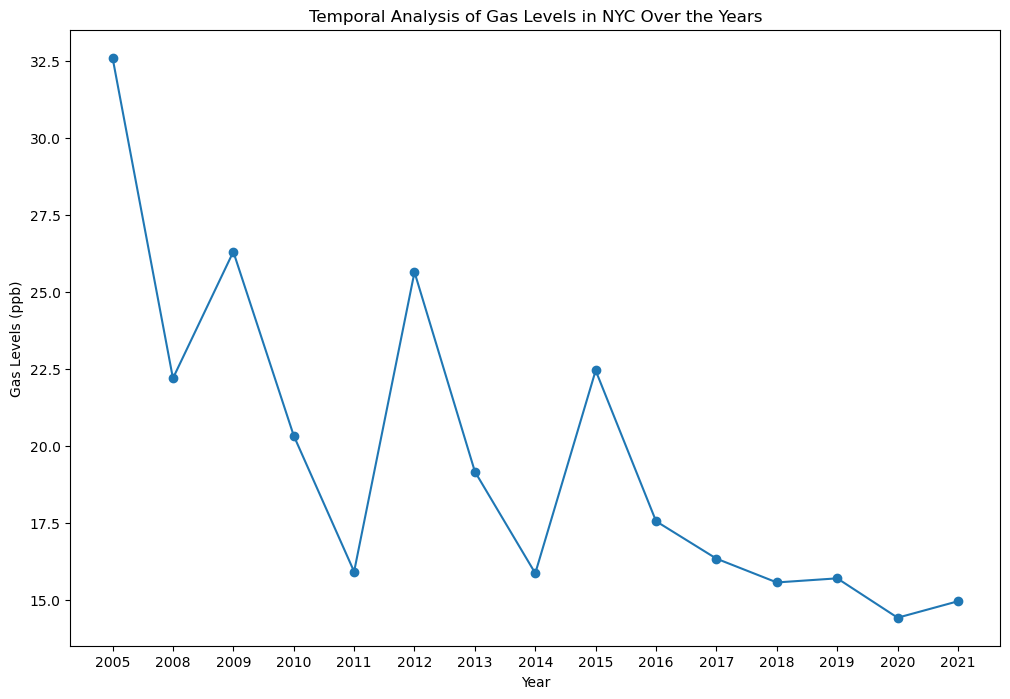

In [20]:
# Plotting the time series for the current gas
# Plotting time series for all unique gases
plt.figure(figsize=(12, 8))
plt.plot(annual_avg['Year'], annual_avg['Data Value'], marker='o', label=gas_data)
# Adding title, labels, and legend to the plot
plt.title('Temporal Analysis of Gas Levels in NYC Over the Years')
plt.xlabel('Year')
plt.ylabel('Gas Levels (ppb)')

"Gas Levels (ppb)" is used as the label for the y-axis, and it refers to the values in the 'Data Value' column of the dataset. The 'Data Value' column contains the concentrations of various gases, and the label "Gas Levels (ppb)" is a way of indicating the unit of measurement for these values, which is parts per billion (ppb).


figsize=(12, 8): This parameter specifies the size of the figure in inches. The figsize parameter takes a tuple of two values representing the width and height of the figure, respectively. In this case, (12, 8) sets the width to 12 inches and the height to 8 inches.

In [21]:
df.head()

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message,Year
0,172653,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2011,12/01/2010,25.30,NaN,2011
1,172585,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2009,12/01/2008,26.93,NaN,2009
2,336637,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,204,East New York,Annual Average 2015,01/01/2015,19.09,NaN,2015
3,336622,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,103,Fordham - Bronx Pk,Annual Average 2015,01/01/2015,19.76,NaN,2015
4,172582,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,104,Pelham - Throgs Neck,Annual Average 2009,12/01/2008,22.83,NaN,2009


In [22]:
# Grouping by neighborhood and calculating the average levels for each gas
neighborhood_avg = df.groupby(['Geo Place Name', 'Name'])['Data Value'].mean().reset_index()

"Group the DataFrame by neighborhood and gas type, calculate the average data value for each group, and reset the index to obtain a flat DataFrame with the results."

In [23]:
neighborhood_avg

,Geo Place Name,Name,Data Value
0,Bay Ridge and Dyker Heights (CD10),Annual vehicle miles traveled,29.400000
1,Bay Ridge and Dyker Heights (CD10),Annual vehicle miles travelled (cars),27.500000
2,Bay Ridge and Dyker Heights (CD10),Annual vehicle miles travelled (trucks),1.700000
3,Bay Ridge and Dyker Heights (CD10),Fine particles (PM 2.5),8.813333
4,Bay Ridge and Dyker Heights (CD10),Nitrogen dioxide (NO2),19.621795
...,...,...,...
1352,Woodside and Sunnyside (CD2),Fine particles (PM 2.5),10.363077
1353,Woodside and Sunnyside (CD2),Nitrogen dioxide (NO2),22.383590
1354,Woodside and Sunnyside (CD2),Outdoor Air Toxics - Benzene,1.830000
1355,Woodside and Sunnyside (CD2),Outdoor Air Toxics - Formaldehyde,2.400000


In [24]:
# Sorting neighborhoods by average levels 
neighborhood_avg = neighborhood_avg.sort_values(by='Data Value', ascending=False)

In [25]:
neighborhood_avg

,Geo Place Name,Name,Data Value
512,Gramercy Park - Murray Hill,Boiler Emissions- Total NOx Emissions,270.4500
1212,Upper East Side,Boiler Emissions- Total NOx Emissions,247.8500
1241,Upper West Side,Boiler Emissions- Total NOx Emissions,229.2000
204,Central Harlem - Morningside Heights,Asthma emergency department visits due to PM2.5,215.0575
347,East Harlem,Asthma emergency department visits due to PM2.5,212.6825
...,...,...,...
1124,Staten Island,Boiler Emissions- Total PM2.5 Emissions,0.0000
988,Rockaways,Boiler Emissions- Total PM2.5 Emissions,0.0000
895,Port Richmond,Boiler Emissions- Total SO2 Emissions,0.0000
894,Port Richmond,Boiler Emissions- Total PM2.5 Emissions,0.0000


In [26]:
neighborhood_avg['Name'].unique()

array(['Boiler Emissions- Total NOx Emissions',
       'Asthma emergency department visits due to PM2.5',
       'Asthma emergency departments visits due to Ozone',
       'Deaths due to PM2.5', 'Annual vehicle miles traveled',
       'Boiler Emissions- Total SO2 Emissions',
       'Annual vehicle miles travelled (cars)', 'Ozone (O3)',
       'Nitrogen dioxide (NO2)', 'Asthma hospitalizations due to Ozone',
       'Respiratory hospitalizations due to PM2.5 (age 20+)',
       'Cardiovascular hospitalizations due to PM2.5 (age 40+)',
       'Fine particles (PM 2.5)',
       'Cardiac and respiratory deaths due to Ozone',
       'Boiler Emissions- Total PM2.5 Emissions',
       'Annual vehicle miles travelled (trucks)',
       'Outdoor Air Toxics - Benzene',
       'Outdoor Air Toxics - Formaldehyde'], dtype=object)

C:\Users\EKENE\AppData\Local\Temp\ipykernel_20816\1299525253.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(neighborhood_avg['Name'].unique()))


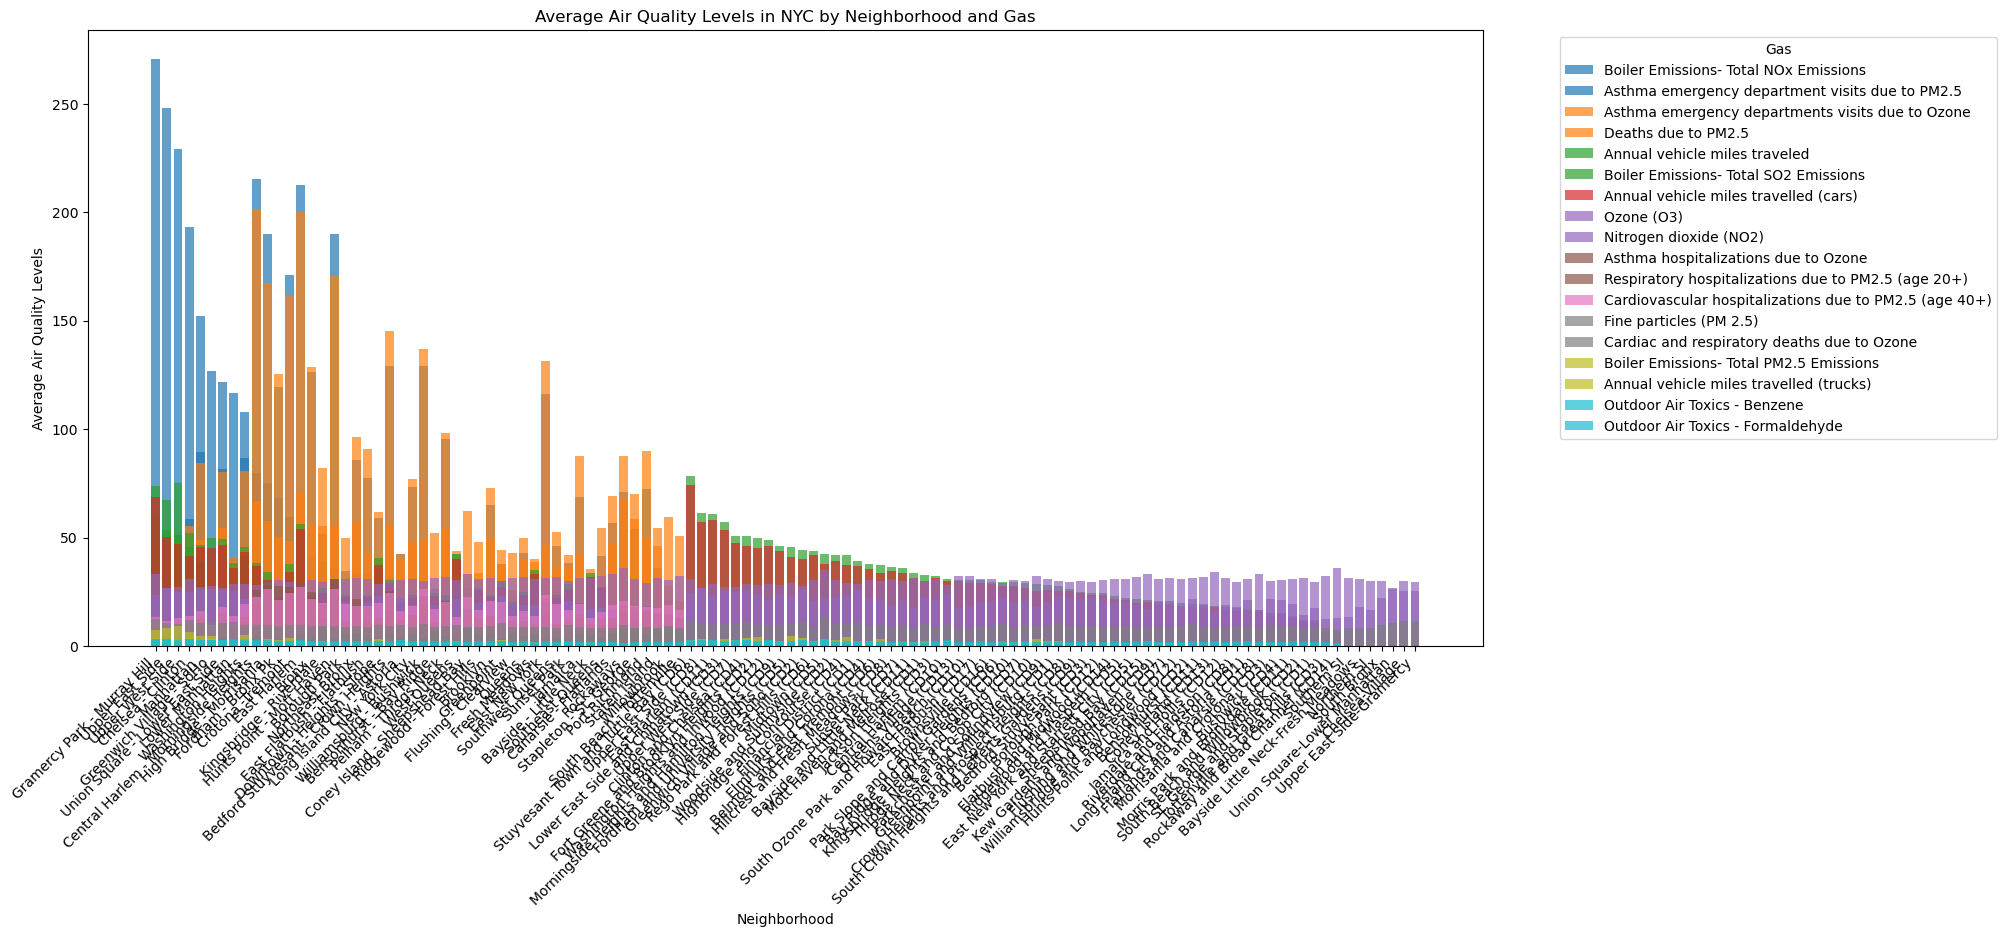

In [27]:
plt.figure(figsize=(18, 8))
colors = plt.cm.get_cmap('tab10', len(neighborhood_avg['Name'].unique()))
bar_width = 0.2
for i, gas in enumerate(neighborhood_avg['Name'].unique()):
    gas_data = neighborhood_avg[neighborhood_avg['Name'] == gas]
    plt.bar(
        gas_data['Geo Place Name'], gas_data['Data Value'],
        color=colors(i), label=gas, alpha=0.7
    )

plt.title('Average Air Quality Levels in NYC by Neighborhood and Gas')
plt.xlabel('Neighborhood')
plt.ylabel('Average Air Quality Levels')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better visibility
plt.legend(title='Gas', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



C:\Users\EKENE\AppData\Local\Temp\ipykernel_20816\3806762521.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(neighborhood_avg['Name'].unique()))


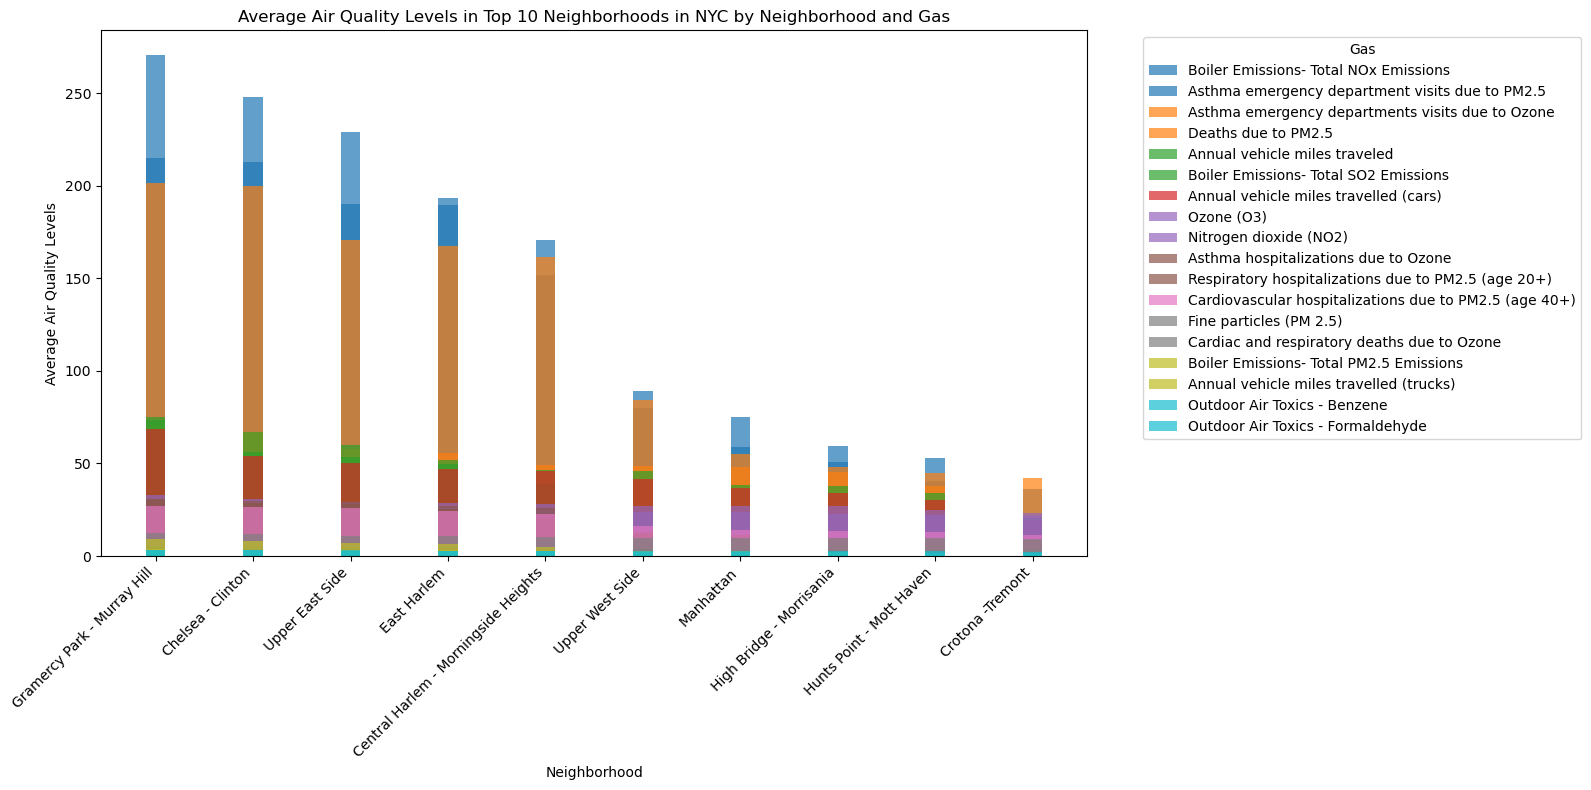

In [28]:
# Assuming you want to show the top 10 neighborhoods
top_n_neighborhoods = neighborhood_avg.groupby('Geo Place Name')['Data Value'].mean().nlargest(10).index

plt.figure(figsize=(16, 8))
colors = plt.cm.get_cmap('tab10', len(neighborhood_avg['Name'].unique()))

for i, gas in enumerate(neighborhood_avg['Name'].unique()):
    gas_data = neighborhood_avg[(neighborhood_avg['Name'] == gas) & (neighborhood_avg['Geo Place Name'].isin(top_n_neighborhoods))]
    
    # Convert 'Geo Place Name' to string before concatenation
    neighborhoods = gas_data['Geo Place Name'].astype(str)
    
    # Use position parameter to specify x-axis positions
    positions = range(len(neighborhoods))  # Use integers as positions
    
    plt.bar(
        positions, gas_data['Data Value'],
        color=colors(i), label=gas, alpha=0.7, width=bar_width,
        tick_label=neighborhoods.tolist()  # Set x-axis labels
    )

plt.title('Average Air Quality Levels in Top 10 Neighborhoods in NYC by Neighborhood and Gas')
plt.xlabel('Neighborhood')
plt.ylabel('Average Air Quality Levels')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gas', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns


In [30]:
# Mapping each month to its corresponding season
month_to_season = {
    1: 'Winter', 2: 'Winter', 3: 'Spring',
    4: 'Spring', 5: 'Spring', 6: 'Summer',
    7: 'Summer', 8: 'Summer', 9: 'Fall',
    10: 'Fall', 11: 'Fall', 12: 'Winter'
}

# Extract the month from the 'Start_Date' column
df['Month'] = pd.to_datetime(df['Start_Date']).dt.month

# Map the month to its corresponding season
df['Season'] = df['Month'].map(month_to_season)




In [31]:
df['Season']

0        Winter
1        Winter
2        Winter
3        Winter
4        Winter
          ...  
16213    Winter
16214    Winter
16215    Winter
16216    Winter
16217    Winter
Name: Season, Length: 16218, dtype: object

In [32]:
df.head()

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message,Year,Month,Season
0,172653,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2011,12/01/2010,25.30,NaN,2011,12,Winter
1,172585,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2009,12/01/2008,26.93,NaN,2009,12,Winter
2,336637,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,204,East New York,Annual Average 2015,01/01/2015,19.09,NaN,2015,1,Winter
3,336622,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,103,Fordham - Bronx Pk,Annual Average 2015,01/01/2015,19.76,NaN,2015,1,Winter
4,172582,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,104,Pelham - Throgs Neck,Annual Average 2009,12/01/2008,22.83,NaN,2009,12,Winter


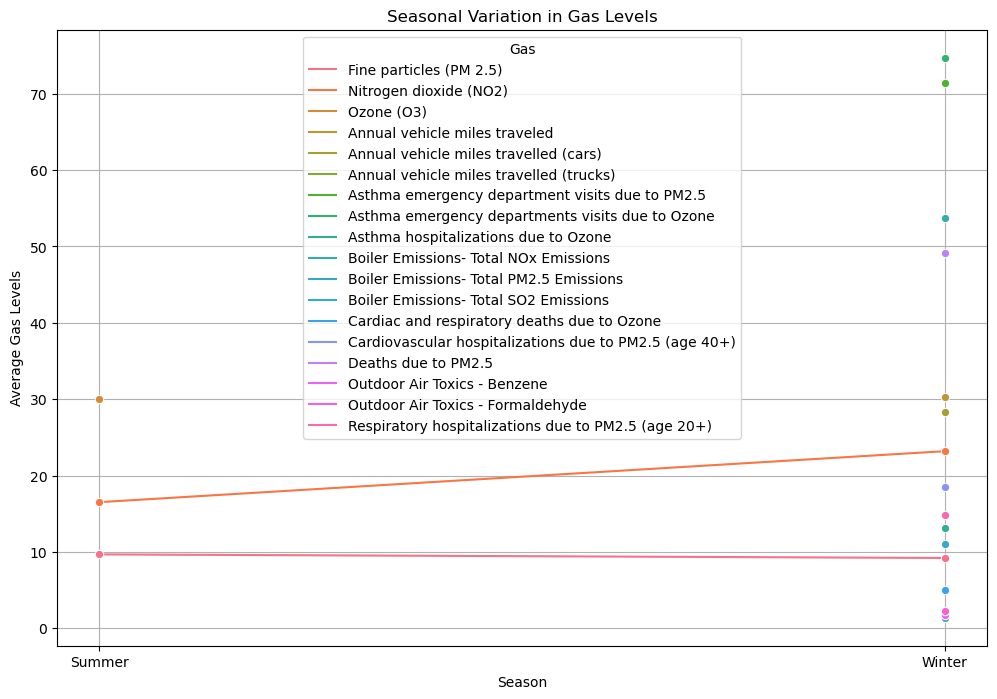

In [33]:
# Grouping by season and gas, calculating the average levels
seasonal_avg = df.groupby(['Season', 'Name'])['Data Value'].mean().reset_index()

# Plotting line charts for each gas
plt.figure(figsize=(12, 8))
sns.lineplot(x='Season', y='Data Value', hue='Name', data=seasonal_avg, marker='o')

plt.title('Seasonal Variation in Gas Levels')
plt.xlabel('Season')
plt.ylabel('Average Gas Levels')
plt.legend(title='Gas')
plt.grid(True)
plt.show()

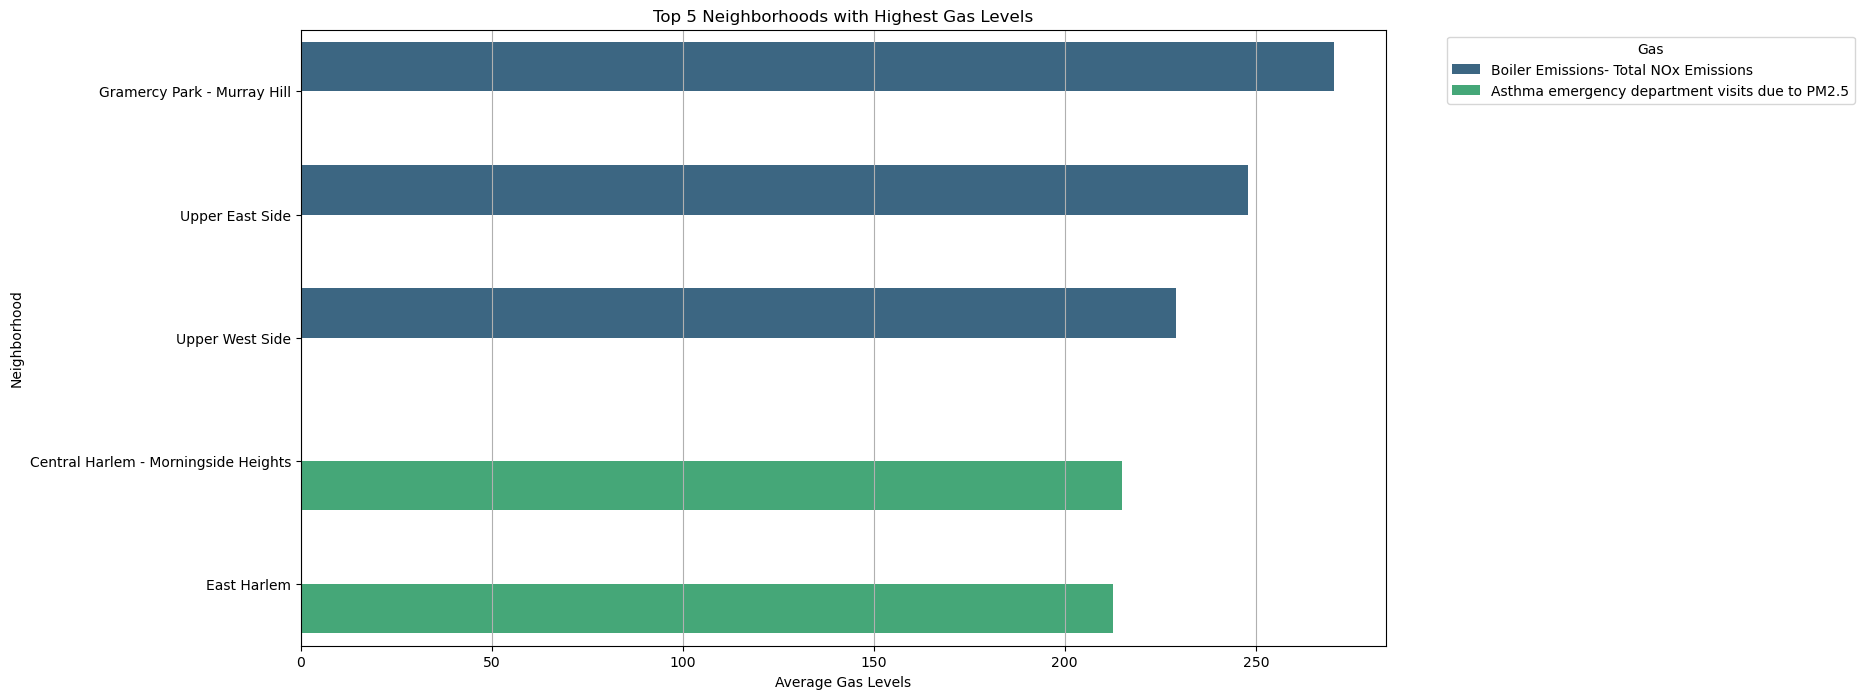

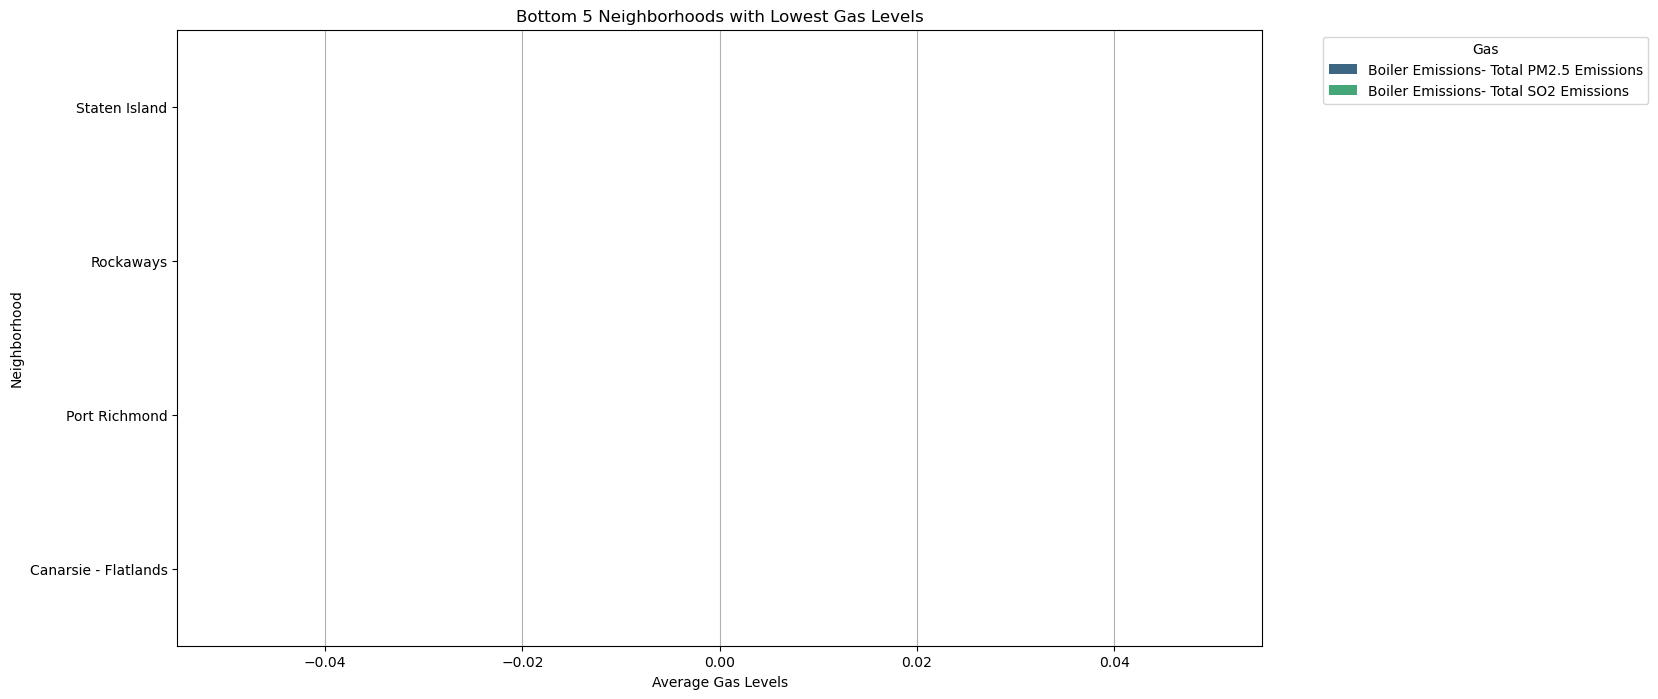

Top 5 Neighborhoods with Highest Gas Levels:
                            Geo Place Name  \
512            Gramercy Park - Murray Hill   
1212                       Upper East Side   
1241                       Upper West Side   
204   Central Harlem - Morningside Heights   
347                            East Harlem   

                                                 Name  Data Value  
512             Boiler Emissions- Total NOx Emissions    270.4500  
1212            Boiler Emissions- Total NOx Emissions    247.8500  
1241            Boiler Emissions- Total NOx Emissions    229.2000  
204   Asthma emergency department visits due to PM2.5    215.0575  
347   Asthma emergency department visits due to PM2.5    212.6825  

Bottom 5 Neighborhoods with Lowest Gas Levels:
            Geo Place Name                                     Name  \
1124         Staten Island  Boiler Emissions- Total PM2.5 Emissions   
988              Rockaways  Boiler Emissions- Total PM2.5 Emissions   
895      

In [34]:

# Grouping by neighborhood and calculating the average gas levels
neighborhood_avg = df.groupby(['Geo Place Name', 'Name'])['Data Value'].mean().reset_index()

# Sorting by average gas levels in descending order
sorted_neighborhoods = neighborhood_avg.sort_values(by='Data Value', ascending=False)

# Top 5 neighborhoods
top_5 = sorted_neighborhoods.head(5)

# Bottom 5 neighborhoods
bottom_5 = sorted_neighborhoods.tail(5)

# Visualizing the top and bottom neighborhoods using bar charts
plt.figure(figsize=(14, 8))
sns.barplot(x='Data Value', y='Geo Place Name', hue='Name', data=top_5, palette='viridis')
plt.title('Top 5 Neighborhoods with Highest Gas Levels')
plt.xlabel('Average Gas Levels')
plt.ylabel('Neighborhood')
plt.legend(title='Gas', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x')
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(x='Data Value', y='Geo Place Name', hue='Name', data=bottom_5, palette='viridis')
plt.title('Bottom 5 Neighborhoods with Lowest Gas Levels')
plt.xlabel('Average Gas Levels')
plt.ylabel('Neighborhood')
plt.legend(title='Gas', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x')
plt.show()

# Displaying the tables
print("Top 5 Neighborhoods with Highest Gas Levels:")
print(top_5[['Geo Place Name', 'Name', 'Data Value']])

print("\nBottom 5 Neighborhoods with Lowest Gas Levels:")
print(bottom_5[['Geo Place Name', 'Name', 'Data Value']])


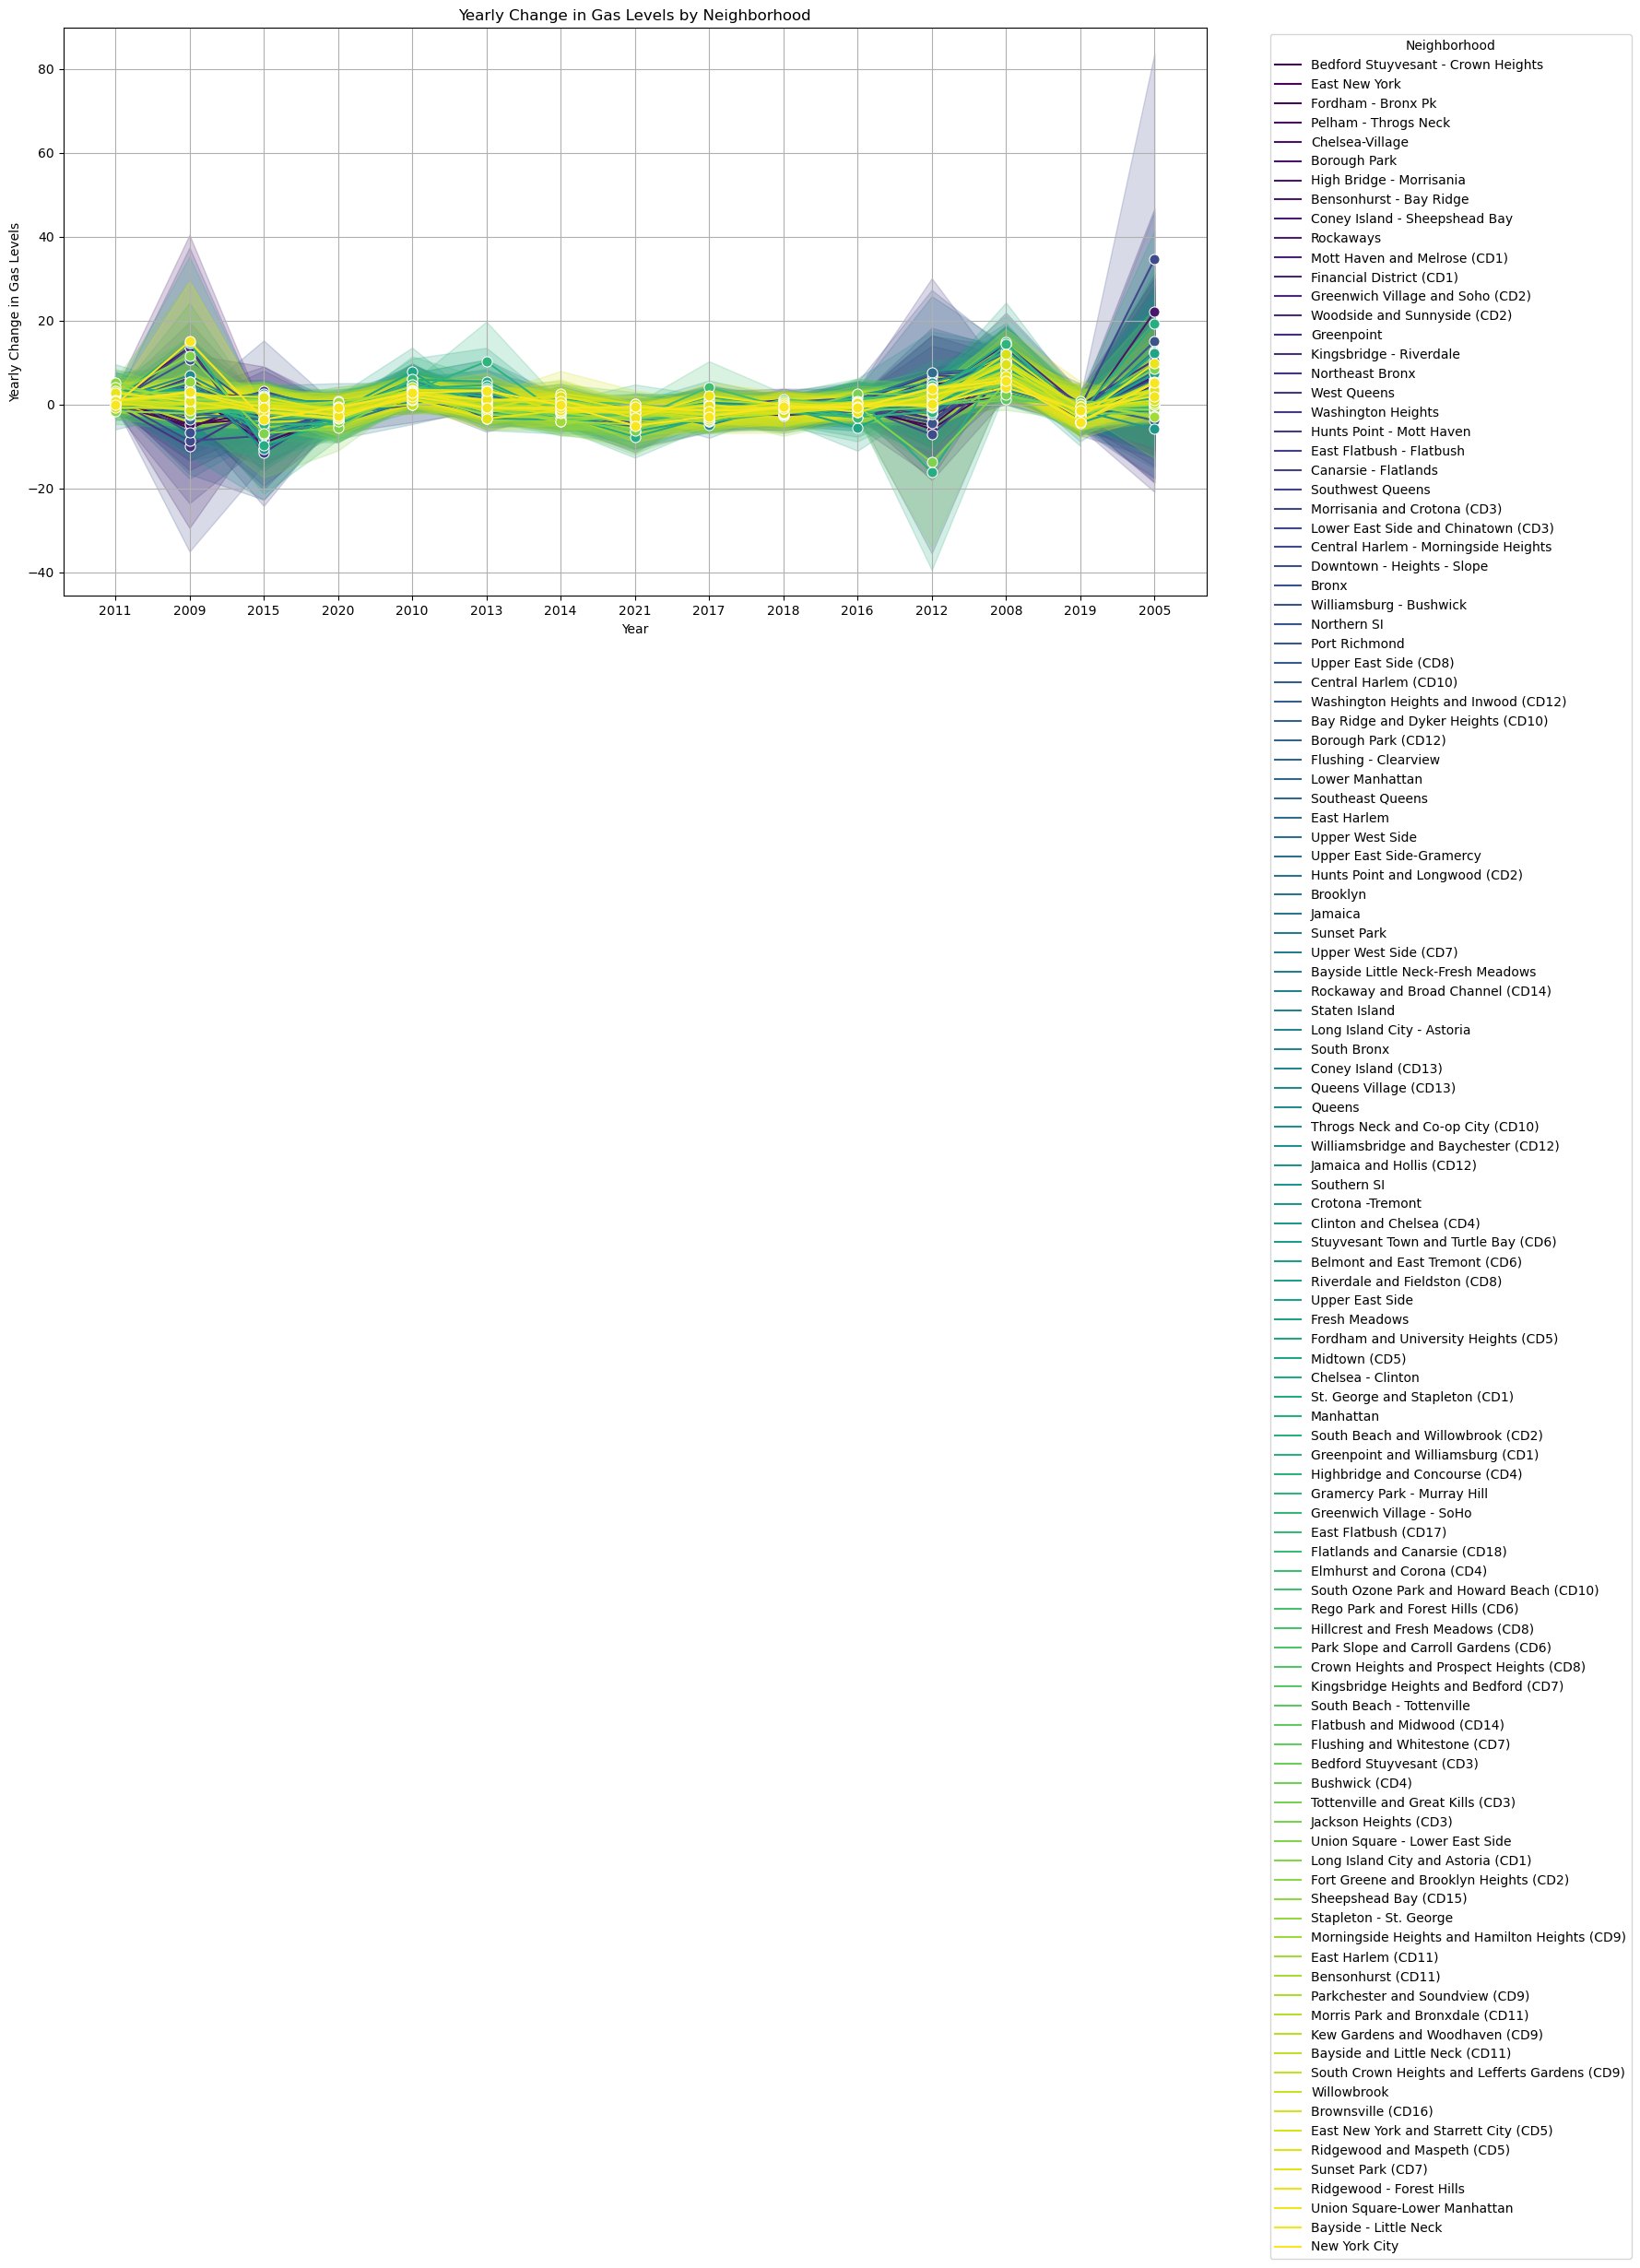

In [35]:
# Calculate the yearly change in gas levels for each neighborhood
df['Yearly Change'] = df.groupby(['Geo Place Name', 'Name'])['Data Value'].diff()

# Visualize the changes using a line chart
plt.figure(figsize=(16, 8))
sns.lineplot(x='Year', y='Yearly Change', hue='Geo Place Name', data=df, palette='viridis', marker='o', markersize=8)
plt.title('Yearly Change in Gas Levels by Neighborhood')
plt.xlabel('Year')
plt.ylabel('Yearly Change in Gas Levels')
plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()